In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, tplquad, simpson

# Lista de exercícios 7

## Métodos implementados

In [ ]:
def trapeze_rule(f, a, b):
  return (b - a)/2 * (f(a) + f(b))

def trapeze_rule_by_samples(y, x):
  result = 0
  for i in range(len(y)-1):
    result += (x[i+1] - x[i])/2 * (y[i] + y[i+1])
  return result

In [ ]:
def repeated_trapeze_rule(f, a, b, m):
  h = (b-a)/m
  x = np.linspace(a, b, m+1)
  fx = f(x)
  result = (h/2) * (fx[0] + 2 * np.sum(fx[1:-1]) + fx[-1])
  return result

In [ ]:
def simpson_one_third(f, a, b):
  '''
  Aproxima f(x) por um polinômio interpolador de grau 2
  '''
  h = (b-a) / 2
  x1 = a + h
  result = (h/3) * (f(a) + 4 * f(x1) + f(b))
  return result

def simpson_one_third_by_samples(y, x):
  result = 0
  X = np.c_[x[:-2:2],x[1:-1:2],x[2::2]]
  Y = np.c_[y[:-2:2],y[1:-1:2],y[2::2]]
  for xi, yi in zip(X, Y):
    h = (xi[2]-xi[0])/2
    result += h/3 * (yi[0] + 4*yi[1] + yi[2])
  return result

In [ ]:
def simpson_three_eighths(f, a, b):
  '''
  Aproxima f(x) por um polinômio interpolador de grau 3
  '''
  h = (b-a) / 3
  x1, x2 = a + h, a + 2*h
  result = (3 * h / 8) * (f(a) + 3*f(x1) + 3*f(x2) + f(b))
  return result

def simpson_three_eighths_by_samples(y, x):
  result = 0
  X = np.c_[x[:-3:3],x[1:-2:3],x[2:-1:3], x[3::3]]
  Y = np.c_[y[:-3:3],y[1:-2:3],y[2:-1:3], y[3::3]]
  for xi, yi in zip(X, Y):
    h = (xi[3]-xi[0])/3
    result += 3*h/8 * (yi[0] + 3*yi[1] + 3*yi[2] + yi[3])
  return result

In [ ]:
def repeated_simpson_one_third(f, a, b, m):
  ''' parâmetro m precisa ser múltiplo de 2 '''
  h = (b-a) / m
  x = np.linspace(a, b, m+1)
  fx = f(x)
  c = np.array([1] + [4,2] * int((m-2)/2) + [4,1])
  result = (h / 3) * np.sum(c * fx)
  return result

def repeated_simpson_one_third_by_samples(y, x):
  ''' parâmetro m precisa ser múltiplo de 2 '''
  h = x[1] - x[0]
  integral = h/3 * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-1:2].sum())
  return integral

In [ ]:
def repeated_simpson_three_eighths(f, a, b, m):
  h = (b-a) / m
  x = np.linspace(a, b, m+1)
  fx = f(x)
  c = np.array([1] + [3] * (m-1) + [1])
  c[int(len(c)/2)] = 2
  result = (3*h / 8) * np.sum(c * fx)
  return result

def repeated_simpson_three_eighths_by_samples(y, x):
  h = x[1] - x[0]
  integral = 3*h/8 * (y[0] + y[-1] + 3*y[1:-1:3].sum() + 3*y[2:-1:3].sum() + 2*y[3:-1:3].sum())
  return integral

In [ ]:
def double_integral(x, y, fxy, integrate):
  dx_integral = []
  for i,fxy_value in enumerate(fxy):
    dx_integral.append(integrate(fxy_value, x))

  dx_integral = np.array(dx_integral)

  return integrate(dx_integral, y)

In [ ]:
def triple_integral(x, y, z, fxyz, integrate):
  integral_dydx = []

  for i,ri in enumerate(fxyz):
    integral_dx = []

    for i,rij in enumerate(ri):
      itg = integrate(rij, x)
      integral_dx.append(itg)

    itg = integrate(integral_dx, y)
    integral_dydx.append(itg)

  return integrate(integral_dydx, z)

## 1) Calcule a seguinte integral:

$\int_{0}^{\pi/2} (6 + 3cos(x)) dx $

In [ ]:
f = lambda x: 6 + 3*np.cos(x)
a, b = 0, np.pi/2
true_res = quad(f, a, b)[0]
true_res

12.424777960769381

### (a) Por uma única e múltiplas aplicações da regra do trapézio: 1 ≤ n ≤ 10

In [ ]:
res = trapeze_rule(f, a, b)
print(f"Resultado via regra do trapézio: {res:.4f}")

Resultado via regra do trapézio: 11.7810


In [ ]:
res_vet_1a = []
n_1a = range(1,11)
for i in n_1a:
  res = repeated_trapeze_rule(f, a, b, i)
  res_vet_1a.append(res)
  print(f"Resultado via regra do trapézio múltipla com n={i}: {res:.4f}")

Resultado via regra do trapézio múltipla com n=1: 11.7810
Resultado via regra do trapézio múltipla com n=2: 12.2690
Resultado via regra do trapézio múltipla com n=3: 12.3559
Resultado via regra do trapézio múltipla com n=4: 12.3861
Resultado via regra do trapézio múltipla com n=5: 12.4001
Resultado via regra do trapézio múltipla com n=6: 12.4076
Resultado via regra do trapézio múltipla com n=7: 12.4122
Resultado via regra do trapézio múltipla com n=8: 12.4151
Resultado via regra do trapézio múltipla com n=9: 12.4172
Resultado via regra do trapézio múltipla com n=10: 12.4186


### (b) Por uma única e múltiplas aplicações da regra 1/3 de Simpson: n = 2, 4, 6, 8, 10;

In [ ]:
res = simpson_one_third(f, a, b)
print(f"Resultado via 1/3 de Simpson: {res:.4f}")

Resultado via 1/3 de Simpson: 12.4316


In [ ]:
res_vet_1b = []
n_1b = range(2, 12, 2)
for i in n_1b:
  res = repeated_simpson_one_third(f, a, b, i)
  res_vet_1b.append(res)
  print(f"Resultado via 1/3 de Simpson múltipla com n={i}: {res:.4f}")

Resultado via 1/3 de Simpson múltipla com n=2: 12.4316
Resultado via 1/3 de Simpson múltipla com n=4: 12.4252
Resultado via 1/3 de Simpson múltipla com n=6: 12.4249
Resultado via 1/3 de Simpson múltipla com n=8: 12.4248
Resultado via 1/3 de Simpson múltipla com n=10: 12.4248


### (c) Por uma única e múltiplas aplicações das regras de $\frac{1}{3}$ e $\frac{3}{8}$ de Simpson: n = 3, 4, 5, 6, 7, 8, 9, 10


In [ ]:
res = simpson_three_eighths(f, a, b)
print(f"Resultado via 3/8 de Simpson: {res:.4f}")

Resultado via 3/8 de Simpson: 12.4278


In [ ]:
res_vet_1c = []
N = np.arange(3,11)
for n in N:
  x = np.linspace(a, b, n)
  y = f(x)
  s13 = (n-1)%2
  s38 = (n-1)%3

  i = 0
  if s38 == 0:
    i = repeated_simpson_three_eighths_by_samples(y, x)
  elif s13 == 0:
    i = repeated_simpson_one_third_by_samples(y, x)
  else:
    p13 = (7 - 2*s38)
    x13,y13 = x[:p13], y[:p13]
    x38,y38 = x[p13 - 1:], y[p13 - 1:]
    i = repeated_simpson_one_third_by_samples(y13, x13) + repeated_simpson_three_eighths_by_samples(y38, x38)
  res_vet_1c.append(i)
res_vet_1c = np.array(res_vet_1c)

### (d) Plote os resultados de cada cálculo de integral nos itens (a), (b) e (c) versus n.

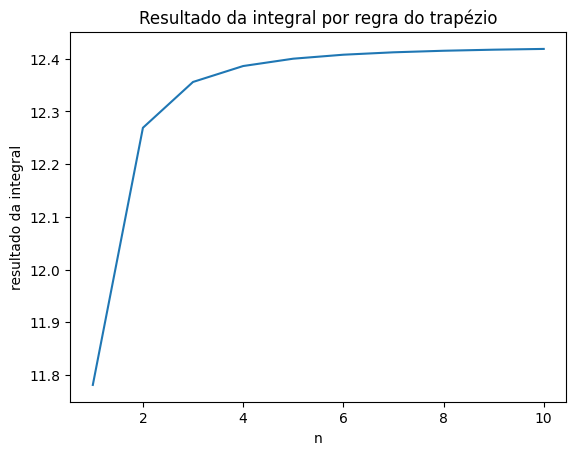

In [ ]:
plt.plot(n_1a, res_vet_1a)
plt.title("Resultado da integral por regra do trapézio")
plt.xlabel("n")
plt.ylabel("resultado da integral")
plt.show()

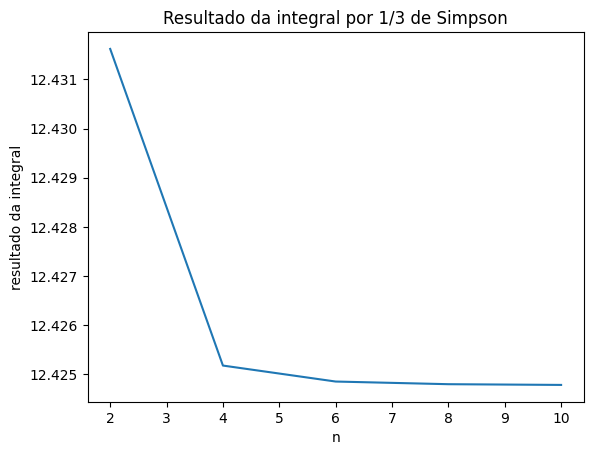

In [ ]:
plt.plot(n_1b, res_vet_1b)
plt.title("Resultado da integral por 1/3 de Simpson")
plt.xlabel("n")
plt.ylabel("resultado da integral")
plt.show()

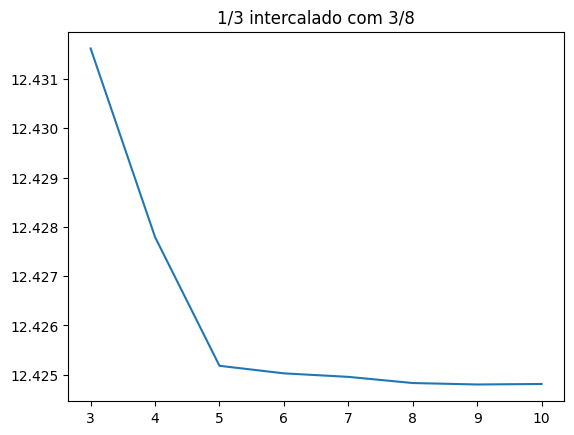

In [ ]:
plt.plot(N,res_vet_1c)
plt.title('1/3 intercalado com 3/8')
plt.show()

### (e) Plote os valores de erro verdadeiro (calculados em relação ao valor do cálculo analítico da integral para cada situação dos itens (a), (b) e (c) em função de n)

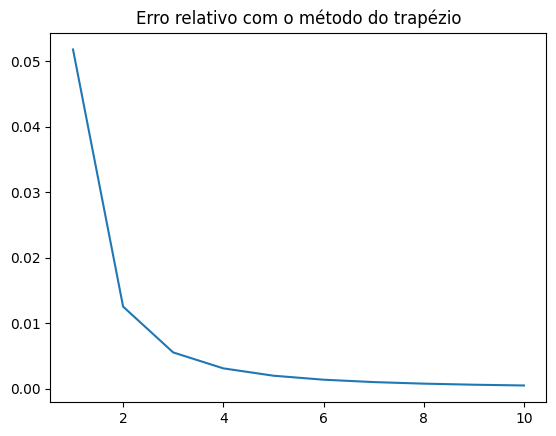

In [ ]:
err_1a = np.abs(np.array(res_vet_1a) - true_res) / true_res
plt.plot(n_1a, err_1a)
plt.title('Erro relativo com o método do trapézio')
plt.show()

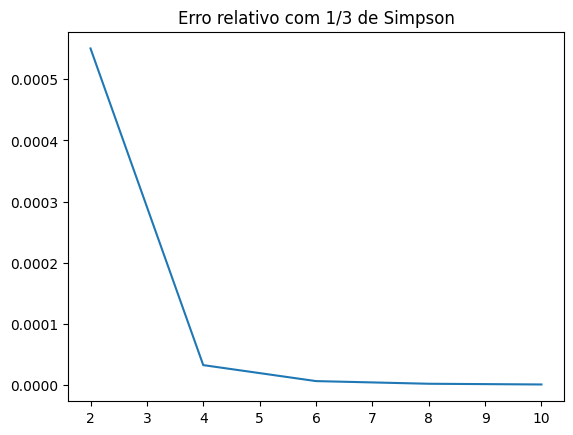

In [ ]:
err_1b = np.abs(np.array(res_vet_1b) - true_res) / true_res
plt.plot(n_1b, err_1b)
plt.title('Erro relativo com 1/3 de Simpson')
plt.show()

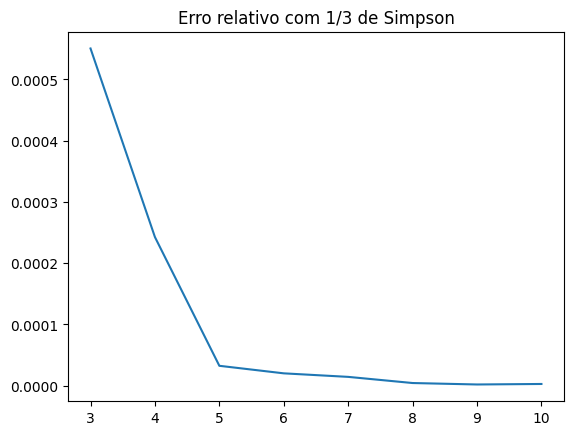

In [ ]:
err_1c = np.abs(np.array(res_vet_1c) - true_res) / true_res
plt.plot(N, err_1c)
plt.title('Erro relativo com 1/3 de Simpson')
plt.show()

## 2) Seja a seguinte integral

$\int_{0}^{3} x^2 e^x \,dx $

In [ ]:
f = lambda x: x**2 * np.exp(x)
a, b = 0, 3
true_res = quad(f, a, b)[0]
true_res

98.42768461593833

### (a) Calcule a quantidade de subintervalos necessários para que o resultado da aplicação múltipla da regra do trapézio apresente erro relativo aproximado abaixo de 0.01. Demonstre a evolução através do gráfico dos valores de erro aproximado em função da quantidade de subintervalos

In [ ]:
epsilon = 0.01
error = 1
i = 1
res = repeated_trapeze_rule(f, a, b, i)
err_2a = []
while error > epsilon:
  i += 1
  res_ant = res
  res = repeated_trapeze_rule(f, a, b, i)
  error = abs((res - res_ant) / res_ant)
  err_2a.append(error)

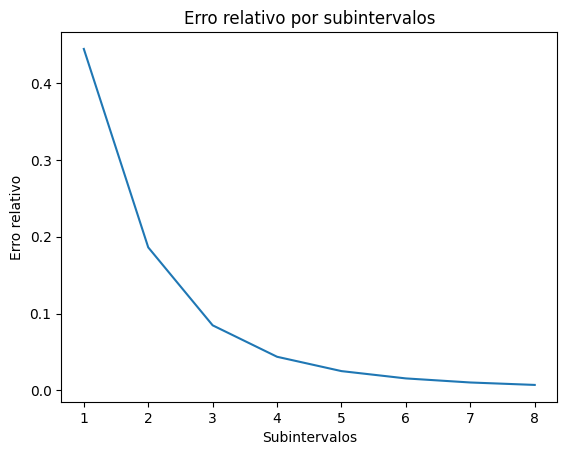

In [ ]:
plt.plot(range(1,len(err_2a)+1), err_2a)
plt.title("Erro relativo por subintervalos")
plt.xlabel("Subintervalos")
plt.ylabel("Erro relativo")
plt.show()

### (b) Repita o mesmo procedimento com a aplicação múltipla da regra 1/3 de Simpson

In [ ]:
epsilon = 0.01
error = 1
i = 2
res = repeated_simpson_one_third(f, a, b, i)
err_2b = []
while error > epsilon:
  i += 2
  res_ant = res
  res = repeated_simpson_one_third(f, a, b, i)
  error = abs((res - res_ant) / res_ant)
  err_2b.append(error)

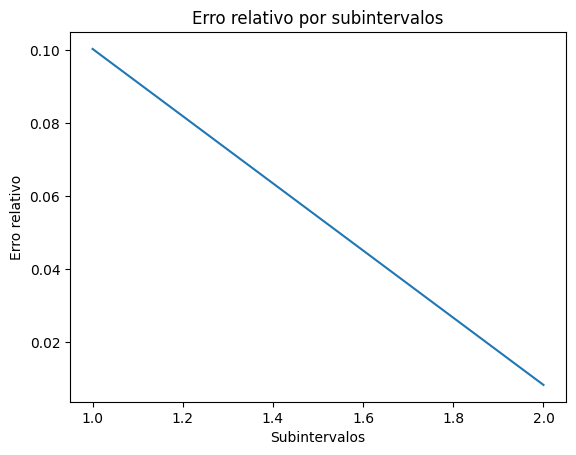

In [ ]:
plt.plot(range(1,len(err_2b)+1), err_2b)
plt.title("Erro relativo por subintervalos")
plt.xlabel("Subintervalos")
plt.ylabel("Erro relativo")
plt.show()

## 3) Determine a distância percorrida a partir dos seguintes dados de velocidade, segundo os critérios abaixo, bem como a velocidade média

$$
\begin{array}{|c|c|}
\hline
\text{t, min} & 1 & 2 & 3,25 & 4,5 & 6 & 7 & 8 & 9 & 9,5 & 10\\
\hline
\text{V, m/s} & 5 & 6 & 5,5 & 7 & 8,5 & 8 & 6 & 7 & 7 & 5\\
\hline
\end{array}
$$

In [ ]:
t_min = [1, 2, 3.25, 4.5, 6, 7, 8, 9, 9.5, 10]
v_ms = [5, 6, 5.5, 7, 8.5, 8, 6, 7, 7, 5]

true_res = simpson(v_ms, t_min)
true_res

61.204166666666666

### (a) Usando aplicações individuais e/ou múltiplas da regra do Trapézio;

In [ ]:
res = trapeze_rule_by_samples(v_ms, t_min)
print(f"Resultado da integral: {res}")

Resultado da integral: 60.375


### (b) Usando aplicações individuais e/ou múltiplas da regra 1/3 de Simpson;

In [ ]:
res = simpson_one_third_by_samples(v_ms, t_min)
print(f"Resultado da integral: {res}")

Resultado da integral: 57.9375


### (c) Usando aplicações individuais e/ou múltiplas da regra 3/8 de Simpson;

In [ ]:
res = simpson_three_eighths_by_samples(v_ms, t_min)
print(f"Resultado da integral: {res}")

Resultado da integral: 60.9375


## 4) Calcule a integral dos seguintes dados tabulares com (a) a regra do Trapézio e (b) as regras de Simpson.

$$
\begin{array}{|c|c|}
\hline
\text{x} & -2 & 0 & 2 & 4 & 6 & 8 & 10\\
\hline
\text{f(x)} & 35 & 5 & -10 & 2 & 5 & 3 & 20\\
\hline
\end{array}
$$

In [ ]:
x = [-2, 0, 2, 4, 6, 8, 10]
fx = [35, 5, -10, 2, 5, 3, 20]

res_trap = trapeze_rule_by_samples(fx, x)
print(f"Resultado da integral via regra do trapézio: {res_trap}")

res_13 = simpson_one_third_by_samples(fx, x)
print(f"Resultado da integral via 1/3 de simpson: {res_13}")

res_38 = simpson_three_eighths_by_samples(fx, x)
print(f"Resultado da integral via 3/8 de simpson: {res_38}")

Resultado da integral via regra do trapézio: 65.0
Resultado da integral via 1/3 de simpson: 56.666666666666664
Resultado da integral via 3/8 de simpson: 51.0


## 5) Calcule a seguinte integral dupla

$ \int_{-1}^{1}\int_{0}^{2} (x^2 - 2y^2 + xy^3) \;dx\;dy \ $

In [ ]:
f = lambda x,y : x**2 - 2*y**2 + x*y**3
x, y = [0, 2], [-1, 1]
true_res = dblquad(f, y[0], y[1], x[0], x[1])[0]
true_res

2.666666666666667

### (a) Usando a aplicação múltipla da regra do trapézio com n = 4;

In [ ]:
x = np.linspace(0,2,4)
y = np.linspace(-1,1,4)
fxy = f(*np.meshgrid(x,y))
res_trap = double_integral(x, y, fxy, trapeze_rule_by_samples)
print(f"Resultado da integral: {res_trap:.3f}")

Resultado da integral: 2.370


### (b) Usando uma aplicação única da regra 1/3 de Simpson;

In [ ]:
x = np.linspace(0,2,3)
y = np.linspace(-1,1,3)
fxy = f(*np.meshgrid(x,y))
res_13 = double_integral(x, y, fxy, simpson_one_third_by_samples)
print(f"Resultado da integral: {res_13:.3f}")

Resultado da integral: 2.667


### (c) Usando uma aplicação única da regra 3/8 de Simpson

In [ ]:
x = np.linspace(0,2,4)
y = np.linspace(-1,1,4)
fxy = f(*np.meshgrid(x,y))
res_38 = double_integral(x, y, fxy, simpson_three_eighths_by_samples)
print(f"Resultado da integral: {res_38:.3f}")

Resultado da integral: 2.667


### (d) Calcule o erro relativo percentual verdadeiro para cada situação.

In [ ]:
err_trap = 100*np.abs((true_res - res_trap)/true_res)
print(f'Erro percentual via regra do trapézio: {err_trap:.2f} %')

err_13 = 100*np.abs((true_res - res_13)/true_res)
print(f'Erro percentual via 1/3 de simpson: {err_13:.2f} %')

err_38 = 100*np.abs((true_res - res_38)/true_res)
print(f'Erro percentual via 3/8 de Simpson: {err_38:.2f} %')

Erro percentual via regra do trapézio: 11.11 %
Erro percentual via 1/3 de simpson: 0.00 %
Erro percentual via 3/8 de Simpson: 0.00 %


## 6) Calcule a seguinte integral tripla usando uma única aplicação da regra 1/3 de Simpson.

$ \int_{-2}^{2}\int_{0}^{2}\int_{-3}^{1} (x^3 - 3yz) \;dx\;dy\;dz \ $

In [ ]:
f = lambda x,y,z: x**3 - 3*y*z
x = [-3, 1]
y = [0, 2]
z = [-2, 2]
true_res = tplquad(f, z[0], z[1], y[0], y[1], x[0], x[1])[0]
true_res

-160.0

In [ ]:
x = np.linspace(-3,1,3)
y = np.linspace(0,2,3)
z = np.linspace(-2,2,3)
fxyz = f(*np.meshgrid(x, y, z))

triple_integral(x, y, z, fxyz, simpson_one_third_by_samples)

-160.0

## 7) A massa total de uma haste de densidade de densidade variável é dada por

$ m = \int_0^L \rho (x).A_c(x) \,dx $,

## em que m é a massa, $\rho(x)$ é a densidade, $A_c(x)$ é a área da seção transversal, x é a distância ao longo da haste, e L é o comprimento total da haste. Os seguintes dados foram medidos para uma haste de 10 m. Determine a massa em quilogramas com a melhor precisão possível.

$$
\begin{array}{|c|c|}
\hline
\text{x,m} & 0 & 2 & 3 & 4 & 6 & 8 & 10\\
\hline
\rho,\frac{g}{cm^3} & 4,00 & 3,95 & 3,89 & 3,80 & 3,60 & 3,41 & 3,30\\
\hline
A_c, cm^2 & 100 & 103 & 106 & 110 & 120 & 133 & 150\\
\hline
\end{array}
$$

In [ ]:
x = np.array([0, 2, 3, 4, 6, 8, 10])
rho = np.array([4, 3.95, 3.89, 3.80, 3.60, 3.41, 3.30])
Ac = np.array([100, 103, 106, 110, 120, 133, 150])
y = rho * Ac

In [ ]:
def find_intervals(arr):
  result = []
  current_diff = arr[1] - arr[0]
  current_indices = [0, 1]

  for i in range(2, len(arr)):
    diff = arr[i] - arr[i-1]
    if diff == current_diff:
      current_indices.append(i)
    else:
      result.append(current_indices)
      current_indices = [i-1, i]
      current_diff = diff

  result.append(current_indices)
  return result

In [ ]:
result = 0
intervals = find_intervals(x)
for interval in intervals:
  if len(interval) == 2:
    result += trapeze_rule_by_samples(y[interval],x[interval])
  if len(interval) == 3:
    result += simpson_one_third_by_samples(y[interval], x[interval])
  elif len(interval) == 4:
    result += simpson_three_eighths_by_samples(y[interval], x[interval])

print(f'Intervals: {intervals}')
print(f'Resultado da integral: {result:.3f}')

Intervals: [[0, 1], [1, 2, 3], [3, 4, 5, 6]]
Resultado da integral: 4308.779


## 8) Um estudo em engenharia de transporte exige que você determine o número de carros que passa por uma intersecção durante o horário de rush da manhã. Você fica em um lado da estrada e conta o número de carros que passa a cada 4 minutos em diferentes instantes, como tabulado a seguir. Use o melhor método numérico para determinar:
$$
\begin{array}{|c|c|}
\hline
\text{Horário (h)} & \text{7:30} & \text{7:45} & \text{8:00} & \text{8:15} & \text{8:45} & \text{9:15}\\
\hline
\text{Taxa (carros em 4 min.} & 18 & 24 & 14 & 24 & 21 & 9\\
\hline
\end{array}
$$

In [ ]:
horario = np.array([7*60 + 30, 7*60 + 45, 8*60 + 00, 8*60 + 15, 8*60 + 45, 9*60 + 15])
taxa = np.array([18, 24, 14, 24, 21, 9]) / 4

### (a) o número total de carros que passam entre 07:30 e 09:15

In [ ]:
intervals = find_intervals(horario)
result = 0
for interval in intervals:
  if len(interval) == 3:
    result += simpson_one_third_by_samples(taxa[interval], horario[interval])
  elif len(interval) == 4:
    result += simpson_three_eighths_by_samples(taxa[interval], horario[interval])

print(f'Intervals: {intervals}')
print(f'Resultado da integral: {result:.3f}')

Intervals: [[0, 1, 2, 3], [3, 4, 5]]
Resultado da integral: 511.875


### (b) a taxa de carros passando pela interseção por minuto.

In [ ]:
result / (horario[-1] - horario[0])

4.875